In [8]:
import importlib
import experiment
import plotting

# Reload the modules after editing
importlib.reload(experiment)
importlib.reload(plotting)

# Re-import the functions if necessary
from experiment import sensitivity_sweep
from plotting import plot_results_2cols

In [13]:
def default_params():
    """
    Defines the default parameters for the experiment.

    Returns:
        dict: A dictionary containing default parameter values.
    """
    params = {
        "time_steps": 10000,  # Total number of time steps for the experiment
        "task_dist": "DetPRL",  # Task distribution type (e.g., Deterministic PRL)
        "init_reward_means": ([1, 0], [1, 0]),  # Initial reward means for tasks
        "init_reward_probs": (0.8, 0.2),  # Initial reward probabilities for tasks
        "task_reward_probs": None,  # Probabilities for task-specific rewards (if applicable)
        "n_tasks": 10,  # Number of tasks in the experiment
        "reward_prob": 1.0,  # Probability of receiving a reward
        "reward_var": 0.5,  # Variance of the reward noise
        "n_trials": 20,  # Number of trials for averaging results
        "wI": [0.0, 0.01, -0.01],  # Exploitative weight values for sensitivity sweep
        "wE": 0.05,  # Exploratory weight for sensitivity sweep
        "alpha": 0.01,  # Learning rate
        "tau": 0.01  # Entropy regularization coefficient
    }
    return params


# Role of Inhibition in Adaptive Learning:
 Showing the policy performance for two settings of the
policy Q-value precision (scaling, policy learning rate) wE , high (Top) and low (Bottom), and two choices of
inhibition strength wI , positive (Left) and negative (Right), averaged over 20 trials
 Shades denote standard
deviation. (Top-Bottom) Uncertainty elicited by continual learning and reward noise is amplified by high
policy precision (red baseline)

 (Bottom) Negative inhibition can amplify policy updates with too low precision
(Right), whereas positive inhibition slows down learning

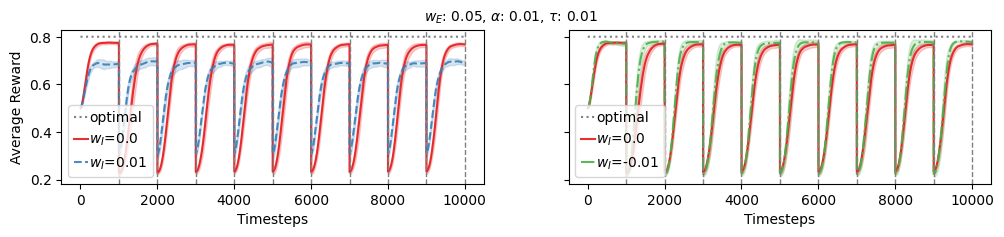

In [14]:
# Load default parameters
params = default_params()

# Run the sensitivity analysis, sweeping over wI
histories, environment = sensitivity_sweep(params, sweep_over="wI")

# Plot the results
plot_results_2cols(params, histories, environment, "avg_reward")

# Effect of the Policy Precision wE on Entropy
Showing the policy entropy for two settings of the precision wE (Top-Bottom) and two settings of positive and negative inhibition (Left-Right)

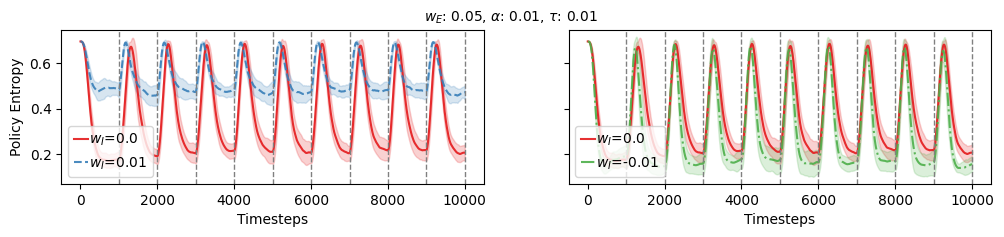

In [15]:
plot_results_2cols(params, histories, environment, "entropy")

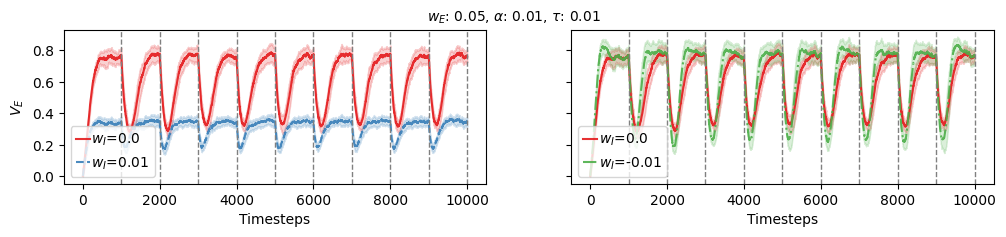

In [16]:
plot_results_2cols(params, histories, environment, "V_E")

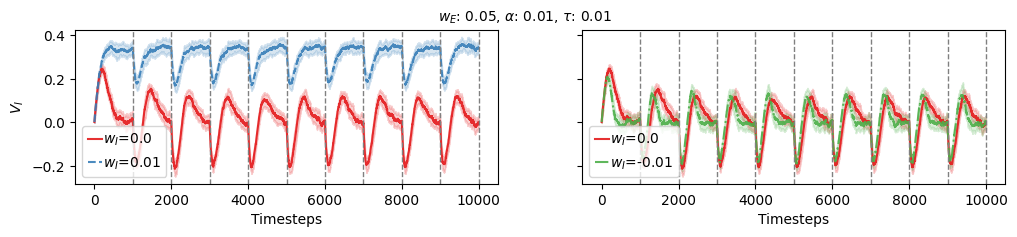

In [17]:
plot_results_2cols(params, histories, environment, "V_I")